In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

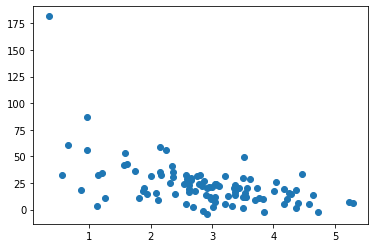

In [3]:
np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount);

### Holdout 20% test - 80% train

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(pageSpeeds, purchaseAmount,test_size=0.2, random_state=42)

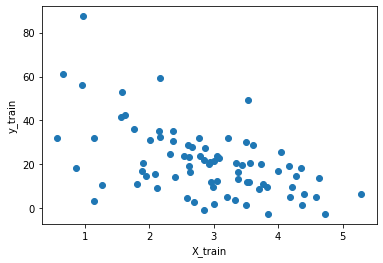

In [8]:
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.scatter(X_train, y_train);

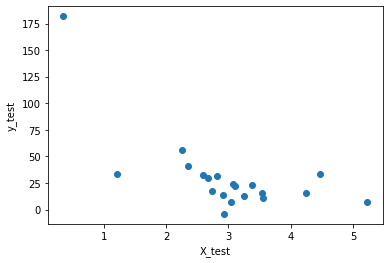

In [9]:
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.scatter(X_test, y_test);

In [10]:
len(X_train)

80

In [23]:
# fit 16th-degree polynomial to this data - OVERFITTING
x = np.array(X_train)
y = np.array(y_train)

p4 = np.poly1d(np.polyfit(x, y, 16))

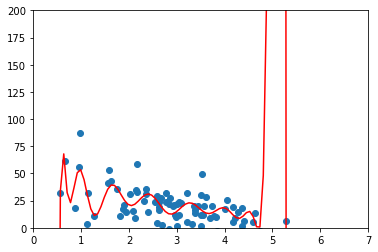

In [24]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

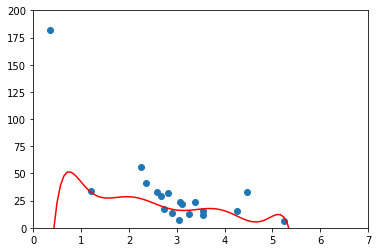

In [27]:
x_test = np.array(X_test)
y_test = np.array(y_test)

# Polynomy 8th
p4 = np.poly1d(np.polyfit(x, y, 8))

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(x_test, y_test)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression, LassoCV
from lightgbm import LGBMRegressor

In [58]:
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

regressor = LGBMRegressor(max_depth=3)
regressor.fit(X_train.reshape(-1, 1), y_train)

LGBMRegressor(max_depth=3)

In [34]:
predict_y = model.predict(X_test.reshape(-1, 1))

In [36]:
r2_train = r2_score(y_train, X_train.reshape(-1, 1))
r2_test = r2_score(y_test, predict_y)
r2_train, r2_test

(-1.3785289617555554, 0.18291448233944552)

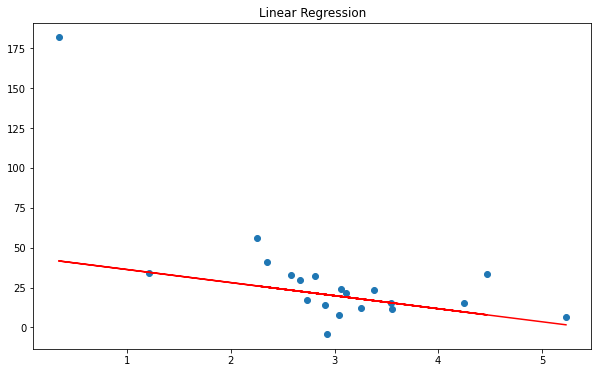

In [39]:
plt.figure(figsize=(10,6))
plt.title('Linear Regression')
plt.scatter(X_test, y_test)
plt.plot(X_test, predict_y, c='red')
plt.show()

In [59]:
predict_y_regressor = regressor.predict(X_test.reshape(-1, 1))

In [60]:
r2_train = r2_score(y_train, X_train.reshape(-1, 1))
r2_test = r2_score(y_test, predict_y_regressor)
r2_train, r2_test

(-1.3785289617555554, 0.10999082456534248)

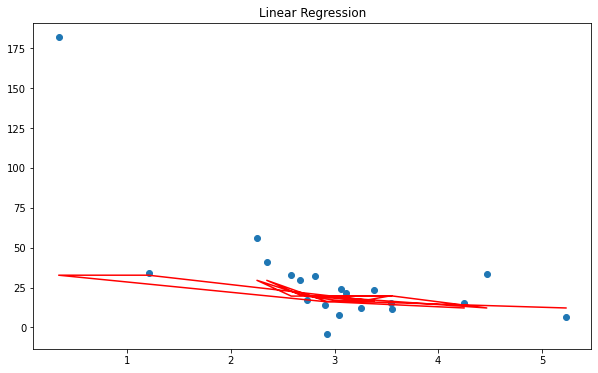

In [61]:
plt.figure(figsize=(10,6))
plt.title('Linear Regression')
plt.scatter(X_test, y_test)
plt.plot(X_test, predict_y_regressor, c='red')
plt.show()